In [2]:
print("Hello World")

Hello World


Pandas is an essential tool for data engineers in large part because it is at the center of data science
You can think of a DataFrame as a kind of table, similar to an Excel spreadsheet, but much more powerful.

What will you learn?
After this unit, you will be able to:

Load, modify, and analyze a DataFrame
Transform a Series of data
Leverage lambda expressions to write custom programs to manipulate your DataFrames
Perform SQL-like functions on multiple DataFrames


Create a DataFrame I
A DataFrame is an object that stores data as rows and columns.
You can manually create a DataFrame or fill it with data from a : CSV, an Excel spreadsheet, or a SQL query.

DataFrames have rows and columns. 
   Each column has a name, which is a string. 
   Each row has an index, which is an integer. 

 

In [4]:
import pandas as pd

df1 = pd.DataFrame({
  'Product ID': [1, 2, 3, 4],
  # add Product Name and Color here
  'Product Name' : ['t-shirt','t-shirt','skirt','skirt'],
  'Color':['blue','green','red','black']
})

print(df1)

   Product ID Product Name  Color
0           1      t-shirt   blue
1           2      t-shirt  green
2           3        skirt    red
3           4        skirt  black


#You can also add data using lists.
For example, you can pass in a list of lists, where each one represents a row of data. Use the keyword argument columns to pass a list of column names.




In [5]:
df2 = pd.DataFrame([
    ['John Smith', '123 Main St.', 34],
    ['Jane Doe', '456 Maple Ave.', 28],
    ['Joe Schmo', '789 Broadway', 51]
    ],
    columns=['name', 'address', 'age'])

In [6]:
print(df2)

         name         address  age
0  John Smith    123 Main St.   34
1    Jane Doe  456 Maple Ave.   28
2   Joe Schmo    789 Broadway   51


Comma Separated Variables (CSV)
One of the most common formats for big datasets is the CSV.
Loading and Saving CSVs

When you have data in a CSV, you can load it into a DataFrame in Pandas using .read_csv():
pd.read_csv('my-csv-file.csv')
We can also save data to a CSV, using .to_csv().
df.to_csv('new-csv-file.csv')


In [10]:
import pandas as pd
df = pd.read_csv('sample.csv')

print(df)


   id name
0   1  'A'


Inspect a DataFrame
When we load a new DataFrame from a CSV, we want to know what it looks like.
The method .head() gives the first 5 rows of a DataFrame.

If you want to see more rows, you can pass in the positional argument n. For example, df.head(10) would show the first 10 rows.

The method df.info() gives some statistics for each column.

import pandas as pd

#load the CSV below:

df = pd.read_csv('imdb.csv')

print(df.head())

print(df.info())


# Select Column

import pandas as pd

df = pd.DataFrame([
  ['January', 100, 100, 23, 100],
  ['February', 51, 45, 145, 45],
  ['March', 81, 96, 65, 96],
  ['April', 80, 80, 54, 180],
  ['May', 51, 54, 54, 154],
  ['June', 112, 109, 79, 129]],
  columns=['month', 'clinic_east',
           'clinic_north', 'clinic_south',
           'clinic_west']
)
clinic_north = df.clinic_north
print(type(clinic_north))
print(type(df))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>

## Selecting Multiple Columns
new_df = orders[['last_name', 'email']]

Note: Make sure that you have a double set of brackets ([[]]), or this command won’t work!

<class 'pandas.core.frame.DataFrame'>

In [11]:
import pandas as pd

df = pd.DataFrame([
  ['January', 100, 100, 23, 100],
  ['February', 51, 45, 145, 45],
  ['March', 81, 96, 65, 96],
  ['April', 80, 80, 54, 180],
  ['May', 51, 54, 54, 154],
  ['June', 112, 109, 79, 129]],
  columns=['month', 'clinic_east',
           'clinic_north', 'clinic_south',
           'clinic_west']
)

clinic_north_south  = df[['clinic_north','clinic_south']]

print(type(clinic_north_south))

<class 'pandas.core.frame.DataFrame'>


## Select Rows
DataFrames are zero-indexed, meaning that we start with the 0th row and count up from there.
orders.iloc[2]

When we select a single row, the result is a Series (just like when we select a single column).




In [12]:
import pandas as pd

df = pd.DataFrame([
  ['January', 100, 100, 23, 100],
  ['February', 51, 45, 145, 45],
  ['March', 81, 96, 65, 96],
  ['April', 80, 80, 54, 180],
  ['May', 51, 54, 54, 154],
  ['June', 112, 109, 79, 129]],
  columns=['month', 'clinic_east',
           'clinic_north', 'clinic_south',
           'clinic_west'])
march = df.iloc[2]
print(march)
print(type(march))


month           March
clinic_east        81
clinic_north       96
clinic_south       65
clinic_west        96
Name: 2, dtype: object
<class 'pandas.core.series.Series'>


In [13]:
df.head()

,month,clinic_east,clinic_north,clinic_south,clinic_west
0,January,100,100,23,100
1,February,51,45,145,45
2,March,81,96,65,96
3,April,80,80,54,180
4,May,51,54,54,154


## Selecting Multiple Rows
orders.iloc[3:7] would select all rows starting at the 3rd row and up to but not including the 7th row (i.e., the 3rd row, 4th row, 5th row, and 6th row)

orders.iloc[:4] would select all rows up to, but not including the 4th row (i.e., the 0th, 1st, 2nd, and 3rd rows)

orders.iloc[-3:] would select the rows starting at the 3rd to last row and up to and including the final row



In [14]:
import pandas as pd

df = pd.DataFrame([
  ['January', 100, 100, 23, 100],
  ['February', 51, 45, 145, 45],
  ['March', 81, 96, 65, 96],
  ['April', 80, 80, 54, 180],
  ['May', 51, 54, 54, 154],
  ['June', 112, 109, 79, 129]],
  columns=['month', 'clinic_east',
           'clinic_north', 'clinic_south',
           'clinic_west']
)
april_may_june = df.iloc[3:6]
print(april_may_june)

   month  clinic_east  clinic_north  clinic_south  clinic_west
3  April           80            80            54          180
4    May           51            54            54          154
5   June          112           109            79          129


### Select Rows with Logic
You can select a subset of a DataFrame by using logical statements:
df[df.MyColumnName == desired_column_value]

df[df.age == 30]

df[df.name != 'Clara Oswald']



In [15]:
import pandas as pd

df = pd.DataFrame([
  ['January', 100, 100, 23, 100],
  ['February', 51, 45, 145, 45],
  ['March', 81, 96, 65, 96],
  ['April', 80, 80, 54, 180],
  ['May', 51, 54, 54, 154],
  ['June', 112, 109, 79, 129]],
  columns=['month', 'clinic_east',
           'clinic_north', 'clinic_south',
           'clinic_west'])

january = df[df.month == 'January']   
print(january)

     month  clinic_east  clinic_north  clinic_south  clinic_west
0  January          100           100            23          100


### Select Rows with Logic
You can also combine multiple logical statements, as long as each statement is in parentheses.
df[(df.age < 30) |
   (df.name == 'Martha Jones')]
   
   In Python, | means “or” and & means “and”.
   
   

In [16]:
import pandas as pd

df = pd.DataFrame([
  ['January', 100, 100, 23, 100],
  ['February', 51, 45, 145, 45],
  ['March', 81, 96, 65, 96],
  ['April', 80, 80, 54, 180],
  ['May', 51, 54, 54, 154],
  ['June', 112, 109, 79, 129]],
  columns=['month', 'clinic_east',
           'clinic_north', 'clinic_south',
           'clinic_west'])

march_april = df[(df.month =='March') | (df.month =='April')]
print(march_april)

   month  clinic_east  clinic_north  clinic_south  clinic_west
2  March           81            96            65           96
3  April           80            80            54          180


### Select Rows with Logic III
We could use the <span style="color:red">isin</span>  command to check that df.name is one of a list of values:

df[df.name.isin(['Martha Jones',
     'Rose Tyler',
     'Amy Pond'])]
     


In [17]:
import pandas as pd

df = pd.DataFrame([
  ['January', 100, 100, 23, 100],
  ['February', 51, 45, 145, 45],
  ['March', 81, 96, 65, 96],
  ['April', 80, 80, 54, 180],
  ['May', 51, 54, 54, 154],
  ['June', 112, 109, 79, 129]],
  columns=['month', 'clinic_east',
           'clinic_north', 'clinic_south',
           'clinic_west'])
january_february_march = df[df.month.isin(['January','February','March'])]
print(january_february_march)

      month  clinic_east  clinic_north  clinic_south  clinic_west
0   January          100           100            23          100
1  February           51            45           145           45
2     March           81            96            65           96


## Setting indices
When we select a subset of a DataFrame using logic, we end up with non-consecutive indices. This is inelegant and makes it hard to use .iloc().
We can fix this using the method .reset_index().
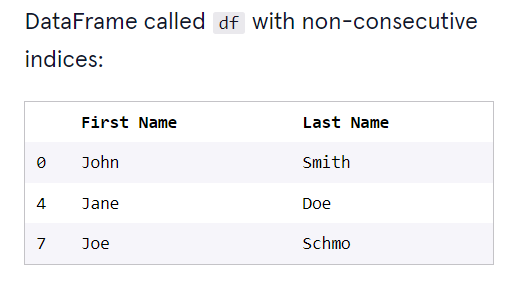

If we use the command df.reset_index(), we get a new DataFrame with a new set of indices:

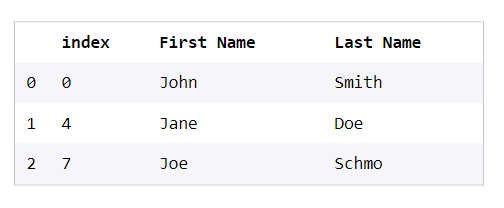

Note that the old indices have been moved into a new column called 'index'. Unless you need those values for something special, it’s probably better to use the keyword <span style="color:blue"> drop=True </span> so that you don’t end up with that extra column. If we run the command df.reset_index(drop=True), we get a new DataFrame that looks like this:

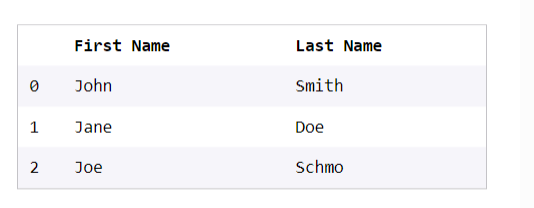

Using .reset_index() will return a new DataFrame, but we usually just want to modify our existing DataFrame. If we use the keyword inplace=True we can just modify our existing DataFrame.


In [18]:
import pandas as pd

df = pd.DataFrame([
  ['January', 100, 100, 23, 100],
  ['February', 51, 45, 145, 45],
  ['March', 81, 96, 65, 96],
  ['April', 80, 80, 54, 180],
  ['May', 51, 54, 54, 154],
  ['June', 112, 109, 79, 129]],
  columns=['month', 'clinic_east',
           'clinic_north', 'clinic_south',
           'clinic_west']
)

df2 = df.loc[[1, 3, 5]]
print(df2)

      month  clinic_east  clinic_north  clinic_south  clinic_west
1  February           51            45           145           45
3     April           80            80            54          180
5      June          112           109            79          129


In [19]:
import pandas as pd

df = pd.DataFrame([
  ['January', 100, 100, 23, 100],
  ['February', 51, 45, 145, 45],
  ['March', 81, 96, 65, 96],
  ['April', 80, 80, 54, 180],
  ['May', 51, 54, 54, 154],
  ['June', 112, 109, 79, 129]],
  columns=['month', 'clinic_east',
           'clinic_north', 'clinic_south',
           'clinic_west']
)

df2 = df.loc[[1, 3, 5]]
print(df2)

df3 = df2.reset_index()
df2.reset_index(inplace=True,drop=True)
print(df2)

      month  clinic_east  clinic_north  clinic_south  clinic_west
1  February           51            45           145           45
3     April           80            80            54          180
5      June          112           109            79          129
      month  clinic_east  clinic_north  clinic_south  clinic_west
0  February           51            45           145           45
1     April           80            80            54          180
2      June          112           109            79          129
